# Incineroar Frame Data Analysis
This notebook connects to the SQLite database and executes various queries to analyze Incineroar's frame data

In [49]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Set up the notebook to display pandas DataFrames nicely
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [51]:
# Connect to the SQLite database
db_path = 'incineroar_frame_data.db'
conn = sqlite3.connect(db_path)

In [52]:
# Helper function to run SQL queries and return the results as a pandas DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

# Database Overview

In [53]:
# Get list of tables
tables = run_query("SELECT name FROM sqlite_master WHERE type='table'")
print("Tables in the database:")
tables

Tables in the database:


,name
0,characters
1,moves
2,hitboxes
3,dodge_data


In [54]:
# Count records in each table
record_counts = run_query("""
SELECT 'characters' AS table_name, COUNT(*) AS record_count FROM characters
UNION ALL
SELECT 'moves', COUNT(*) FROM moves
UNION ALL
SELECT 'hitboxes', COUNT(*) FROM hitboxes
UNION ALL
SELECT 'dodge_data', COUNT(*) FROM dodge_data
""")
record_counts

,table_name,record_count
0,characters,1
1,moves,40
2,hitboxes,198
3,dodge_data,1


# Character Data

In [55]:
# View character data
character_data = run_query("SELECT * FROM characters")
character_data

,character_id,internal_name,display_name,walk_speed,run_speed,dash_speed,air_speed,gravity,fall_speed,fast_fall_speed,weight,jump_squat,air_jumps,shield_size,nair_landing_lag,fair_landing_lag,bair_landing_lag,uair_landing_lag,dair_landing_lag
0,1,gaogaen,Incineroar,0.62,1.18,1.76,0.88,0.126,1.76,2.816,116.0,3,2,11.7,11,14,11,8,16


In [56]:
# View specific attributes
character_attributes = run_query("""
SELECT display_name, weight, fall_speed, gravity, air_speed, run_speed 
FROM characters
""")
character_attributes

,display_name,weight,fall_speed,gravity,air_speed,run_speed
0,Incineroar,116.0,1.76,0.126,0.88,1.18


# Dodge Data

In [57]:
# View dodge frame data
dodge_data = run_query("""
SELECT c.display_name,
       d.spotdodge_intangibility_start, d.spotdodge_intangibility_duration, d.spotdodge_faf,
       d.forward_roll_intangibility_start, d.forward_roll_intangibility_duration, d.forward_roll_faf,
       d.airdodge_intangibility_start, d.airdodge_intangibility_duration, d.airdodge_faf
FROM dodge_data d
JOIN characters c ON d.character_id = c.character_id
""")
dodge_data

,display_name,spotdodge_intangibility_start,spotdodge_intangibility_duration,spotdodge_faf,forward_roll_intangibility_start,forward_roll_intangibility_duration,forward_roll_faf,airdodge_intangibility_start,airdodge_intangibility_duration,airdodge_faf
0,Incineroar,3,15,27,4,12,31,3,27,45


# Move Data

In [58]:
# View all moves
moves_data = run_query("""
SELECT name, move_type, faf, landing_lag, is_smash, is_aerial, is_special
FROM moves 
WHERE character_id = 1
ORDER BY move_type, name
""")
moves_data

,name,move_type,faf,landing_lag,is_smash,is_aerial,is_special
0,Dash Attack,dash,41,0,0,0,0
1,Dash Grab,grab,45,0,0,0,0
2,Grab,grab,37,0,0,0,0
3,Pivot Grab,grab,43,0,0,0,0
4,Jab 1,jab,23,0,0,0,0
5,Jab 2,jab,31,0,0,0,0
6,Jab 3,jab,37,0,0,0,0
7,Alolan Whip (Aerial),unknown,57,0,0,0,0
8,Alolan Whip (Early),unknown,42,0,0,0,0
9,Alolan Whip (Failure),unknown,34,0,0,0,0


In [59]:
# Get aerial moves and their landing lag
aerial_moves = run_query("""
SELECT name, faf, landing_lag 
FROM moves 
WHERE character_id = 1 AND is_aerial = 1
ORDER BY landing_lag
""")
aerial_moves

,name,faf,landing_lag


# Hitbox Data

In [60]:
# View hitboxes for a specific move (change 'Darkest Lariat' to any move you're interested in)
move_of_interest = 'Darkest Lariat'
hitbox_data = run_query(f"""
SELECT m.name, h.hitbox_number, h.damage, h.angle, h.bkb, h.kbg, 
       h.start_frame, h.end_frame
FROM hitboxes h
JOIN moves m ON h.move_id = m.move_id
WHERE m.name = '{move_of_interest}'
ORDER BY h.hitbox_number
""")
hitbox_data

,name,hitbox_number,damage,angle,bkb,kbg,start_frame,end_frame


In [61]:
# Strongest moves (by damage)
strongest_moves = run_query("""
SELECT m.name, MAX(h.damage) AS max_damage
FROM hitboxes h
JOIN moves m ON h.move_id = m.move_id
WHERE m.character_id = 1
GROUP BY m.move_id
ORDER BY max_damage DESC
LIMIT 10
""")
strongest_moves

,name,max_damage
0,Alolan Whip (Lariat),20.0
1,Forward Smash,20.0
2,Darket Lariat (Aerial),17.0
3,Darkest Lariat (Ground),17.0
4,Down Smash,17.0
5,Up Smash,17.0
6,Down Air,15.0
7,Back Throw,14.0
8,Cross Chop (Fall),13.0
9,Back Air,13.0


In [62]:
# Moves with fastest startup
fastest_startup = run_query("""
SELECT m.name, MIN(h.start_frame) AS startup
FROM hitboxes h
JOIN moves m ON h.move_id = m.move_id
WHERE m.character_id = 1
GROUP BY m.move_id
ORDER BY startup
LIMIT 10
""")
fastest_startup

,name,startup
0,Pummel,1
1,Alolan Whip (Failure),1
2,Cross Chop (Landing),1
3,Jab 2,4
4,Jab 3,4
5,Jab 1,5
6,Neutral Air,5
7,Darkest Lariat (Ground),5
8,Darket Lariat (Aerial),5
9,Up Tilt,6


# Specific Frame Data Analysis

In [63]:
# Find moves with long active hitbox frames
long_active_moves = run_query("""
SELECT m.name, 
       MIN(h.start_frame) AS first_active, 
       MAX(h.end_frame) AS last_active,
       MAX(h.end_frame) - MIN(h.start_frame) + 1 AS active_duration
FROM hitboxes h
JOIN moves m ON h.move_id = m.move_id
WHERE m.character_id = 1
GROUP BY m.move_id
HAVING active_duration > 5
ORDER BY active_duration DESC
""")
long_active_moves

,name,first_active,last_active,active_duration
0,Darket Lariat (Aerial),5,57,53
1,Darkest Lariat (Ground),5,57,53
2,Forward Throw,24,56,33
3,Cross Chop (Fall),12,32,21
4,Neutral Air,5,25,21
5,Trip Attack,19,32,14
6,Cross Chop (Rise),11,24,14
7,Alolan Whip (Lariat),8,19,12
8,Alolan Whip (Early),8,17,10
9,Dash Attack,8,15,8


In [64]:
# Analyze frame advantage (estimated)
frame_advantage = run_query("""
SELECT m.name, m.faf, MIN(h.start_frame) AS startup,
       m.faf - MAX(h.end_frame) AS endlag
FROM hitboxes h
JOIN moves m ON h.move_id = m.move_id
WHERE m.character_id = 1
GROUP BY m.move_id
ORDER BY endlag
""")
frame_advantage

,name,faf,startup,endlag
0,Cross Chop (Fall),32,12,0
1,Cross Chop (Rise),26,11,2
2,Pummel,6,1,5
3,Neutral Air,41,5,16
4,Jab 1,23,5,17
5,Revenge,26,8,17
6,Trip Attack,49,19,17
7,Down Tilt,29,9,18
8,Up Air,31,7,20
9,Getup Attack (Up),45,18,21


# Categorized Analysis

In [65]:
# Compare all aerials
aerials = run_query("""
SELECT m.name, MIN(h.start_frame) AS startup, MAX(h.damage) AS max_damage,
       m.landing_lag, m.faf
FROM moves m
JOIN hitboxes h ON m.move_id = h.move_id
WHERE m.is_aerial = 1 AND m.character_id = 1
GROUP BY m.move_id
ORDER BY m.name
""")
aerials

,name,startup,max_damage,landing_lag,faf


In [66]:
# Compare all smash attacks
smash_attacks = run_query("""
SELECT m.name, MIN(h.start_frame) AS startup, MAX(h.damage) AS max_damage,
       m.faf
FROM moves m
JOIN hitboxes h ON m.move_id = h.move_id
WHERE m.is_smash = 1 AND m.character_id = 1
GROUP BY m.move_id
ORDER BY m.name
""")
smash_attacks

,name,startup,max_damage,faf
0,Down Smash,18,17.0,57
1,Forward Smash,16,20.0,51
2,Up Smash,13,17.0,47


In [67]:
# Compare all special moves
special_moves = run_query("""
SELECT m.name, MIN(h.start_frame) AS startup, MAX(h.damage) AS max_damage,
       m.faf
FROM moves m
JOIN hitboxes h ON m.move_id = h.move_id
WHERE m.is_special = 1 AND m.character_id = 1
GROUP BY m.move_id
ORDER BY m.name
""")
special_moves

,name,startup,max_damage,faf


# Visualizations

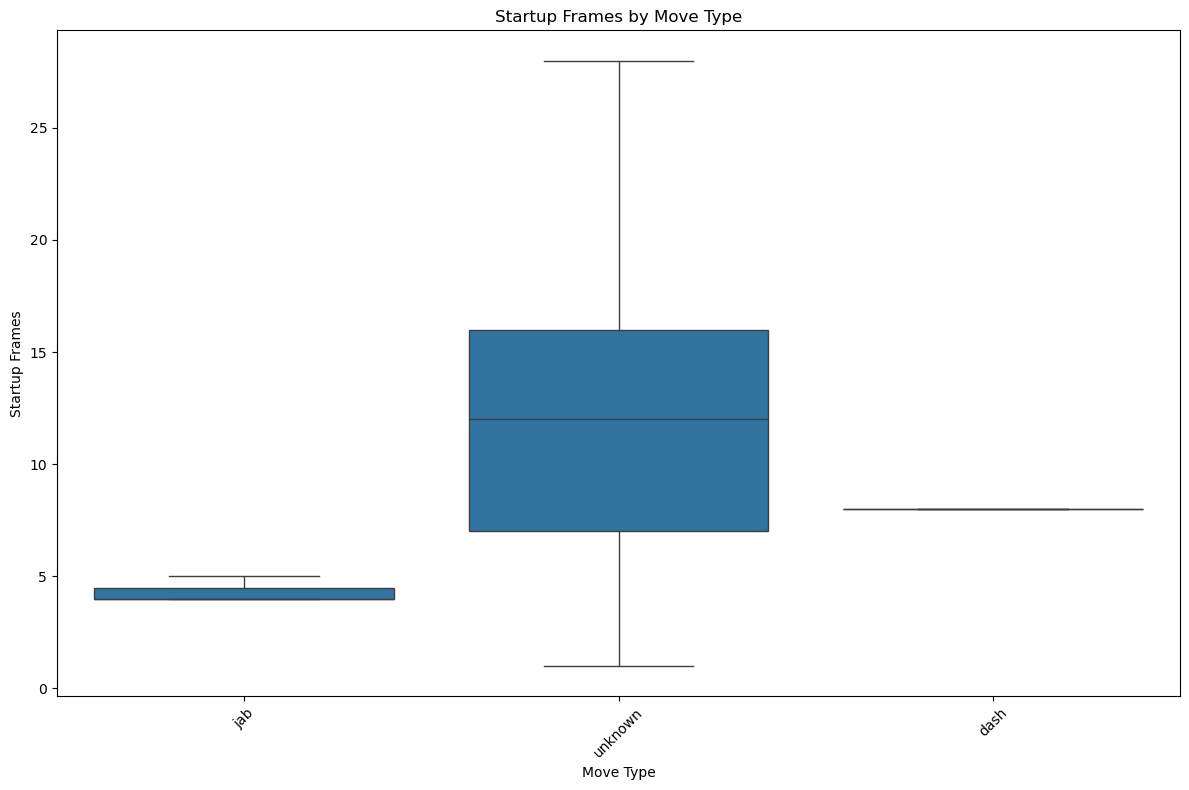

In [68]:
# Startup frames by move type
startup_by_type = run_query("""
SELECT m.move_type, m.name, MIN(h.start_frame) AS startup
FROM moves m
JOIN hitboxes h ON m.move_id = h.move_id
WHERE m.character_id = 1
GROUP BY m.move_id
""")

plt.figure(figsize=(12, 8))
sns.boxplot(x='move_type', y='startup', data=startup_by_type)
plt.title('Startup Frames by Move Type')
plt.xlabel('Move Type')
plt.ylabel('Startup Frames')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

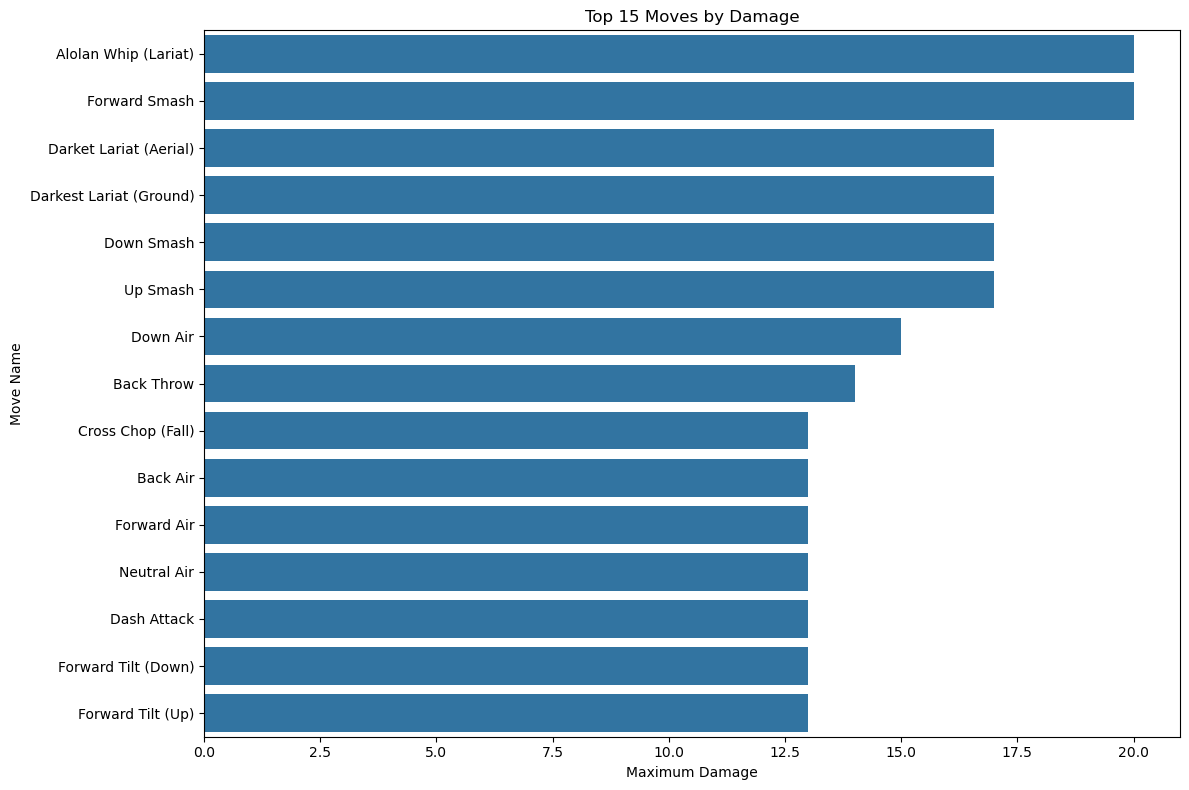

In [69]:
# Move damage comparison
damage_by_move = run_query("""
SELECT m.name, MAX(h.damage) AS max_damage
FROM hitboxes h
JOIN moves m ON h.move_id = m.move_id
WHERE m.character_id = 1
GROUP BY m.move_id
ORDER BY max_damage DESC
LIMIT 15
""")

plt.figure(figsize=(12, 8))
sns.barplot(x='max_damage', y='name', data=damage_by_move)
plt.title('Top 15 Moves by Damage')
plt.xlabel('Maximum Damage')
plt.ylabel('Move Name')
plt.tight_layout()
plt.show()

In [70]:
# Close the database connection when done
conn.close()